# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../train.p'
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

{End of no passing: 672
Beware of ice/snow: 1260
Bumpy road: 1092
Traffic signals: 1680
Vehicles over 3.5 metric tons prohibited: 1176
Road narrows on the right: 756
No passing for vehicles over 3.5 metric tons: 5628
Children crossing: 1512
Turn left ahead: 1176
No entry: 3108
Speed limit (120km/h): 3948
Speed limit (70km/h): 5544
General caution: 3360
Go straight or left: 588
Wild animals crossing: 2184
No passing: 4116
Right-of-way at the next intersection: 3696
Dangerous curve to the left: 588
Double curve: 924
Ahead only: 3360
Keep left: 840
Speed limit (30km/h): 6216
Keep right: 5796
Go straight or right: 1092
Speed limit (50km/h): 6300
Yield: 6048
Stop: 2184
Road work: 4200
Roundabout mandatory: 1008
Speed limit (20km/h): 588
End of all speed and passing limits: 672
Slippery road: 1428
Speed limit (80km/h): 5208
Speed limit (100km/h): 4032
End of no passing by vehicles over 3.5 metric tons: 672
Priority road: 5880
No vehicles: 1764
Turn right ahead: 1928
Speed limit (60km/h): 394

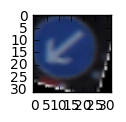

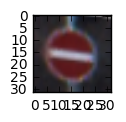

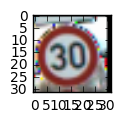

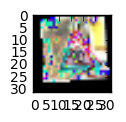

In [11]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import csv
f = open('signnames.csv')
csv_f = csv.reader(f)
signnames = []
first = True
for row in csv_f:
    if first:
        first = False
        continue
    signnames.append(row[1])

signnames_train = [signnames[i] for i in y_train]
from collections import Counter
c = Counter(signnames_train)
print("{" + "\n".join("{}: {}".format(k, v) for k, v in c.items()) + "}")

import random
import numpy as np

print()
class_image = []

for i in (39, 17, 1, 11):
    for index in range(0,y_train.shape[0]):
        if i == y_train[index]:
            image = X_train[index].squeeze()
            plt.figure(figsize=(1,1))
            plt.imshow(image)
            print(y_train[index], signnames[y_train[index]])
            break


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#Normalize data
X_train = np.divide(np.add(X_train, -128),128)
X_test = np.divide(np.add(X_test, -128),128)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The RGB data is normalised (we subtract the mean and divide by variance). Changing RGB to YUV color scheme didn't prove to increase accuracy. 

In [5]:
### Generate data additional data (OPTIONAL!)
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

import cv2
from random import randint

def show(im):
    print()
    plt.figure(figsize=(1,1))
    plt.imshow(im.squeeze())

### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

print(X_train.shape, y_train.shape)
boost = 3
# create slight rotations of original images
X_aug_r = []
for im in X_train:
    #show(im)
    M = cv2.getRotationMatrix2D((randint(0,32),randint(0,32)),randint(-20,20),randint(8,12)/10)
    im = cv2.warpAffine(im,M,(32,32))  
    X_aug_r.append(im)  
    #show(im)
# create slight affine transformations of original set
X_aug_a = []
for im in X_train:
    #show(im)
    pts1 = np.float32([[randint(0,boost),randint(0,boost)],[randint(0,boost),randint(30-boost,31)],[randint(30-boost,31),randint(0,boost)]])
    pts2 = np.float32([[randint(0,boost),randint(0,boost)],[randint(0,boost),randint(30-boost,31)],[randint(30-boost,31),randint(0,boost)]])
    M = cv2.getAffineTransform(pts1,pts2)
    im = cv2.warpAffine(im,M,(32,32)) 
    X_aug_a.append(im)
    #show(im)
X_aug_t = []
for im in X_train:
    #show(im)
    M = np.float32([[1,0,randint(-boost,boost)],[0,1,randint(-boost,boost)]])
    im = cv2.warpAffine(im,M,(32,32)) 
    X_aug_t.append(im)
    #show(im)
X_train = np.concatenate((X_train, X_aug_r, X_aug_a, X_aug_t), axis=0)
y_train = np.concatenate((y_train, y_train, y_train, y_train), axis=0)
print(X_train.shape, y_train.shape)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

(27446, 32, 32, 3) (27446,)
(109784, 32, 32, 3) (109784,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** First, we split out 30% of initial training set to be our validation set. The split is stratified against the labels as traffic signs are far from being uniformely distributed in the training set (see output of data visualisation set). After the split we want to increase remaining training examples by augmenting images and appending them to existing. (Augmentation is not to be done before the split as signs with the same origin may end up being present in both train and validation sets making them related). Here we use OpenCV to augment images in three following ways: random affine transformation (defined by slight movement of three points), random scaled rotation (defined by relatively small angle and scale), random crop (image is shifted by small number of pixels). Transformed images are added to the training set along with original images and all images are reshuffled.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def TraficSignNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Relu Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #  DROPOUT 0.75   
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 14x14x12. Output = 7x7x12.
    ms_conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Relu Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #  DROPOUT 0.75   
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Flatten. Inputs = 5x5x32 + 7x7x12. Output = 1388.
    fc0   = flatten(conv2)
    ms_fc0   = flatten(ms_conv1)
    fc0 = tf.concat(1, [fc0, ms_fc0])
    
    # Layer 3: Fully Connected. Input = 1388. Output = 960.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1388, 960), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(960))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Relu Activation.
    fc1    = tf.nn.relu(fc1)
    
    #  DROPOUT 0.75   
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 7: Fully Connected. Input = 120. Output = 43.
    fc5_W  = tf.Variable(tf.truncated_normal(shape=(960, 43), mean = mu, stddev = sigma))
    fc5_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc5_W) + fc5_b
    
    return logits


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = TraficSignNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The final architecture is a multi-scale convolutional network with two convolutions ([5*5*12] and [5*5*32]) each followed by Relu activation, 2*2 pooling and 0.75 dropout layers. Then it is followed by five fully connected layers ([1388 to 960], [960 to 480], [480 to 240], [240 to 120], [120 to 43 classes]) with Relu activation and 0.75 dropout after each layer apart from the last one that produces 43 logits. 1388 dimention in the first fully connected layer is comprised by the flattened output of the second convolution and flattened output of the first convolution taken through yet another 2 by 2 pooling layer. Multi-scaling idea is taken from the article by Sermanet and LeCun describing impressive results obtained by Sermanet MS convolutional network on the same traffic sign dataset. The purpose of passing both convolution outputs to fully connected layers is to let the network take into account either less elaborated and more elaborated features for predictions. 

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.
import time
import datetime

def gettime():
    time = datetime.datetime.utcnow()
    print(time)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        gettime()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
      
    gettime()
    saver.save(sess, 'traficsignNet')
    print("Model saved")    

Training...

2017-01-09 23:23:18.683496
EPOCH 1 ...
Validation Accuracy = 0.798

2017-01-09 23:24:46.906247
EPOCH 2 ...
Validation Accuracy = 0.920

2017-01-09 23:26:15.299138
EPOCH 3 ...
Validation Accuracy = 0.948

2017-01-09 23:27:43.749957
EPOCH 4 ...
Validation Accuracy = 0.965

2017-01-09 23:29:12.303424
EPOCH 5 ...
Validation Accuracy = 0.974

2017-01-09 23:30:40.915728
EPOCH 6 ...
Validation Accuracy = 0.979

2017-01-09 23:32:09.669322
EPOCH 7 ...
Validation Accuracy = 0.976

2017-01-09 23:33:38.425012
EPOCH 8 ...
Validation Accuracy = 0.989

2017-01-09 23:35:07.348229
EPOCH 9 ...
Validation Accuracy = 0.988

2017-01-09 23:36:36.254827
EPOCH 10 ...
Validation Accuracy = 0.989

2017-01-09 23:38:05.363053
Model saved


In [8]:
# TEST ON TEST SET DO NOT RUN
import tensorflow as tf

with tf.Session() as sess:    
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.883


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Training process minimises loss function that is a cross-entropy calculated on the probabilities calculated as SoftMax of logits and one-hot encoded labels. It uses AdamOptimiser that is an improved version of gradient descent optimiser. The learning rate is 0.001 and the batch size is 128. Network is trained 10 epochs. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** To come up with the network architecture I used combination of solution presented in the article by Sermanet and LeCun and trial and error. First, I have explored the given dataset as to see how labels are distributed in the training set and see examples of images from different labes. It resulted in YUV color scheme change not being used and I ended up simply nomalising RBG color channels for images. Label classes being different in magnitude resulted in stratification being used for validation set split. Then initially LeNet architecture was utilised and gave 0.96 accuracy on original training set. For sensible trial and error in terms of network architecture I did more reading on dropout process, validation procedure and general practices for convolutional networks. The best result was obtained by adding multi-scaling to the first of two 5 by 5 convolutions and increasing number, depth and width of fully connected layers. Dropout was added to regularise network to prevent overfitting. After the dropout was added it became clear that we need larger training set, so image augmentation was introduced. I have used OpenCV because it was already installed for us for Project2, but augmentation and jitterring can be done by various means. The image transformations I chose are supposed to reflect real distortions that can hapen when using vechicle camera.   

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)

(32, 32, 3)

(32, 32, 3)

(32, 32, 3)

(32, 32, 3)

(32, 32, 3)

(32, 32, 3)

[ 231.  220.  214.]


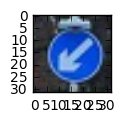

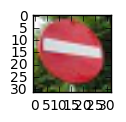

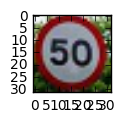

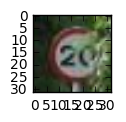

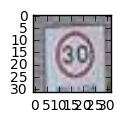

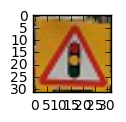

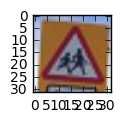

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
test_images = np.zeros((7,32,32,3))
import matplotlib.image as mpimg
import cv2

def load_test_image(image_number):
    im = cv2.imread('./test_images/'+ str(image_number) + '.jpg') # 640x480x3 array
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    print(im.shape)
    show(im)
    return im

for i in range(1,8):
    test_images[i-1] = load_test_image(i)
    
print(test_images[1,15,15,:])
    
# Normilize test images   
test_images = np.divide(np.add(test_images, -128),128)
    
test_labels = [34,34,0,1,17,28]

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 6 new 32 by 32 images containing traffic signs are added to test the model. In one of them the traffic sign is shifted to the left, in two rotated, in one partly covered by leaves, two have curves in the background. Some images have poor quality. 

In [10]:
### Run the predictions here.
### Feel free to use as many code cells as needed.with tf.Session() as sess:    

with tf.Session() as sess:    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    logits = sess.run(logits, feed_dict={x: test_images, y: test_labels, keep_prob: 1.0})
    #test_accuracy = evaluate(test_images, test_labels)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))
    print(np.argmax(logits,axis=1))

[39 17  1  1  1 11 11]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Due to 

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
top_n = (tf.nn.top_k(softmax, k=5))

with tf.Session() as sess:    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax = sess.run(softmax, feed_dict={x: test_images, y: test_labels, keep_prob: 1.0})
    print(softmax)
    
with tf.Session() as sess:    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    top_n = sess.run(top_n, feed_dict={x: test_images, y: test_labels, keep_prob: 1.0})
    print(top_n)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.